# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.




In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['mataura',
 'fare',
 'punta arenas',
 'ulaangom',
 'airai',
 'norman wells',
 'yellowknife',
 'rikitea',
 'paamiut',
 'phan thiet',
 'hilo',
 'castro',
 'saint-philippe',
 'ziro',
 'tremedal',
 'cape town',
 'ushuaia',
 'dongsheng',
 'boone',
 'khatanga',
 'bumba',
 'amanpur',
 'butaritari',
 'mar del plata',
 'adrar',
 'popondetta',
 'shenzhen',
 'zhigalovo',
 'taolanaro',
 'saint-paul-les-dax',
 'temaraia',
 'qaanaaq',
 'georgetown',
 'nome',
 'vaini',
 'mahebourg',
 'san ramon',
 'klaksvik',
 'namibe',
 'luderitz',
 'goedereede',
 'teya',
 'altay',
 'busselton',
 'kruisfontein',
 'yenagoa',
 'toora-khem',
 'albany',
 'bredasdorp',
 'puerto ayora',
 'kodiak',
 'coahuayana',
 'great malvern',
 'morro bay',
 'preobrazheniye',
 'amderma',
 'vostok',
 'chamba',
 'provideniya',
 'avarua',
 'mount isa',
 'atuona',
 'chuy',
 'illoqqortoormiut',
 'hobart',
 'upernavik',
 'new norfolk',
 'carnarvon',
 'east london',
 'barrow',
 'dakar',
 'port alfred',
 'kupang',
 'leningradskiy',
 'chumikan

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#testing cities
# cities2 = ['paraiso', 'olinda', 'vaini', 'cherskiy', 'lazaro cardenas', 'grindavik', 'bushehr', 'rikitea', 'tarboro', 'rolim de moura',  ]

# set up lists to hold reponse info
lat = []
lon = []
city_name = []
temp = []
cloudiness = []
max_temp = []
wind_speed = []
humidity = []
country = []
wind_speed = []
record = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    time.sleep(0.3)
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response["main"]["humidity"])
        temp.append(response['main']['temp_max'])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
        record=record+1
        
        print(f"processing record {record} for {city}")
    except:
        print(f"City not found: {city}")
        


processing record for mataura
processing record for fare
processing record for punta arenas
processing record for ulaangom
processing record for airai
processing record for norman wells
processing record for yellowknife
processing record for rikitea
processing record for paamiut
processing record for phan thiet
processing record for hilo
processing record for castro
processing record for saint-philippe
processing record for ziro
processing record for tremedal
processing record for cape town
processing record for ushuaia
processing record for dongsheng
processing record for boone
processing record for khatanga
processing record for bumba
processing record for amanpur
processing record for butaritari
processing record for mar del plata
processing record for adrar
processing record for popondetta
processing record for shenzhen
processing record for zhigalovo
City not found: taolanaro
processing record for saint-paul-les-dax
City not found: temaraia
processing record for qaanaaq
processing

processing record for cam ranh
processing record for bilibino
City not found: nizhneyansk
processing record for singapore
processing record for solnechnyy
processing record for koundara
processing record for verkhnevilyuysk
processing record for fatsa
processing record for kaitangata
processing record for souillac
processing record for gornopravdinsk
processing record for pevek
processing record for maragogi
processing record for harper
processing record for siniscola
processing record for muzaffarabad
processing record for hay river
processing record for shkoder
City not found: tubruq
processing record for coihaique
processing record for felipe carrillo puerto
City not found: xiongshi
processing record for lompoc
processing record for acapulco
City not found: zlatoustovsk
processing record for port hardy
processing record for klyuchi
processing record for carndonagh
processing record for miri
processing record for fukue
processing record for huarmey
City not found: bolungarvik
process

processing record for porkhov
processing record for jaisalmer
processing record for atambua
processing record for mogadishu
processing record for boa vista
processing record for killarney
processing record for ushibuka
processing record for kawalu
processing record for majene
processing record for tiznit
processing record for buin
processing record for port-gentil
processing record for brandfort
processing record for pontianak
processing record for montpelier
processing record for thana
processing record for krasnovishersk
processing record for lowestoft
processing record for muscat
processing record for soyo
processing record for aktash
processing record for dhar
processing record for okotoks
processing record for naze
processing record for zeya
processing record for saint-augustin
processing record for fort nelson
City not found: bur gabo
processing record for mandurah
processing record for petropavlovsk-kamchatskiy
processing record for plouzane
processing record for kodinsk
process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

#### Note
This step creates a dictionary with the variable arrays from the API call,
Then converts the dictionaries into a Data Frame

In [55]:
weather_dict = {
    "City":city_name,
    "Country":country,    
    "Lat":lat,
    "Lon":lon,
    "Temp":temp,
    "Cloudiness":cloudiness, 
    "Humidity": humidity,
    "Wind Speed":wind_speed
}

weather_df = pd.DataFrame(weather_dict)

#### Note
This step exports the dataframe to a CSV file

In [56]:
weather_df.to_csv('weather.csv')
weather_df.head()

,City,Country,Lat,Lon,Temp,Cloudiness,Humidity,Wind Speed
0,Mataura,NZ,-46.19,168.86,11.67,100,77,0.45
1,Fare,PF,-16.70,-151.02,28.60,98,72,3.89
2,Punta Arenas,CL,-53.15,-70.92,9.00,40,66,9.30
3,Ulaangom,MN,49.98,92.07,-3.20,40,76,1.16
4,Airai,TL,-8.93,125.41,15.95,25,74,0.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

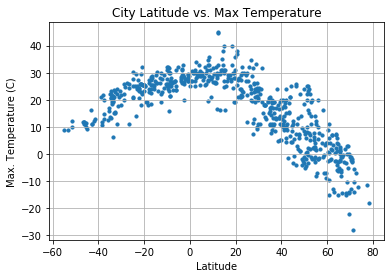

In [57]:
plt.scatter(weather_df["Lat"], weather_df["Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLatitude.png")

# Show plot
plt.show()

#### Note: Plot Latitude vs Temperature 
This scatterplot shows the distribution of Max Temperature by city Latitude, demonstrating that cities near the equator have higher average temperature.  It also shows that cities south of the equator are currently warmer than cities north of the equator

#### Latitude vs. Humidity Plot

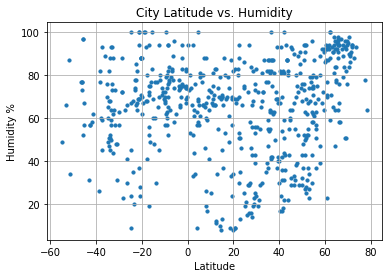

In [59]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityVsLatitude.png")

# Show plot
plt.show()

#### Note
This scatterplot shows latitude versus humidity.  There is not an obvious relationship between these variables.

#### Latitude vs. Cloudiness Plot

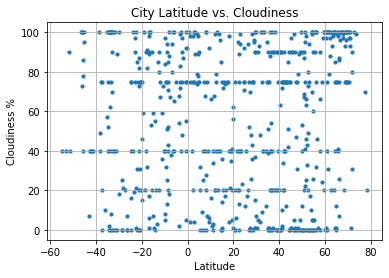

In [60]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessVsLatitude.png")

# Show plot
plt.show()

#### Note
This scatterplot shows cloudindess versus latitude. There is not an obvious relationship.

#### Latitude vs. Wind Speed Plot

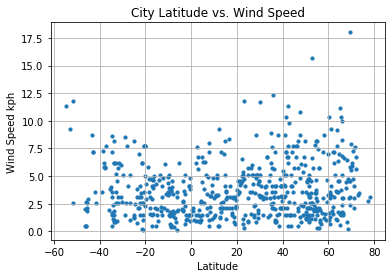

In [61]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed kph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind SpeedVsLatitude.png")

# Show plot
plt.show()

#### Note
This scatterplot shows the relationship between latidude and wind speed.  There is not an obvious relationship, excpet some 
cities closest to the north and south pole have among the highest wind speeds.

## Linear Regression

In [80]:
# OPTIONAL: Create a function to create Linear Regression plots

Northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float)>0,:]
Southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float)<0,:]
#Northern_df.head()
Southern_df.head()


def func_reg_plot(df, title, y_data, y_label, filename, xy):
    x_values = df['Lat']
    y_values = df[y_data]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title)
    print(f"Regression line equation is: {line_eq}")
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(filename)




#### Note
This cell creates data framse for nothern and southern cities, and then creates a function to plot and regress latitude and one other 
variable called in the function for the y-axis.  The function also prints the title and axis using text inputs from the function call.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.58x +36.41
The r-squared is: -0.8639115432064212


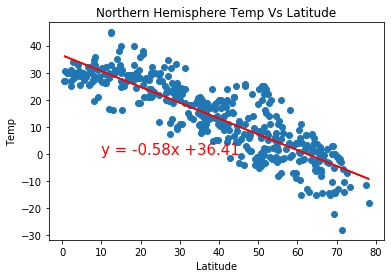

In [81]:
func_reg_plot(Northern_df, 'Northern Hemisphere Temp Vs Latitude', 'Temp', 'Temp', 'regress_north_LatVsTemp.png', (10,0))



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.35x +30.16
The r-squared is: 0.7855427128774639


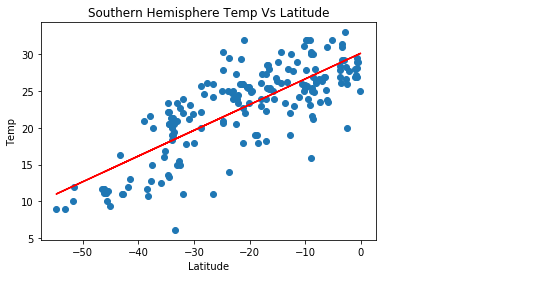

In [82]:
func_reg_plot(Southern_df, 'Southern Hemisphere Temp Vs Latitude', 'Temp', 'Temp', 'regress_Southern_LatVsTemp.png', (10,0))



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.38x +48.69
The r-squared is: 0.3219665480098807


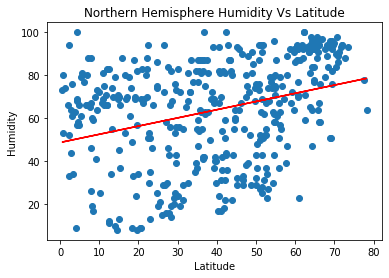

In [83]:
func_reg_plot(Northern_df, 'Northern Hemisphere Humidity Vs Latitude', 'Humidity', 'Humidity', 'regress_north_LatVsHumidity.png', (10,0))



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.32x +75.18
The r-squared is: 0.23377776425010746


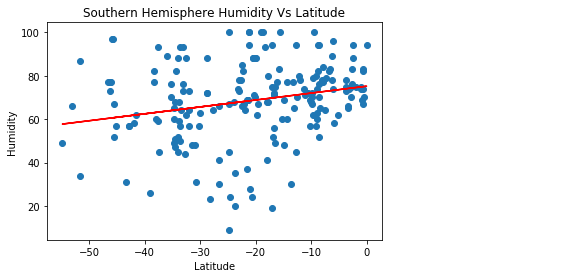

In [84]:
func_reg_plot(Southern_df, 'Southern Hemisphere Humidity Vs Latitude', 'Humidity', 'Humidity', 'regress_Southern_LatVsHumidity.png', (10,0))



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.31x +41.13
The r-squared is: 0.16936541683913162


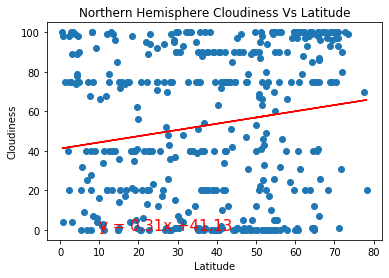

In [85]:
func_reg_plot(Northern_df, 'Northern Hemisphere Cloudiness Vs Latitude', 'Cloudiness', 'Cloudiness', 'regress_north_LatVsCloudiness.png', (10,0))



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.16x +59.77
The r-squared is: 0.06198404327577432


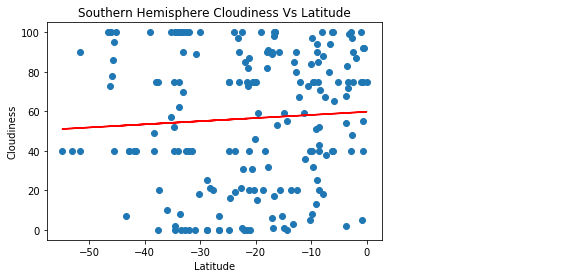

In [86]:
func_reg_plot(Southern_df, 'Southern Hemisphere Cloudiness Vs Latitude', 'Cloudiness', 'Cloudiness', 'regress_Southern_LatVsCloudiness.png', (10,0))



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x +3.21
The r-squared is: 0.13265609037477016


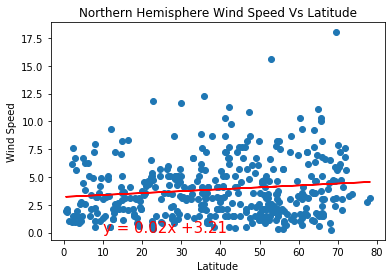

In [87]:
func_reg_plot(Northern_df, 'Northern Hemisphere Wind Speed Vs Latitude', 'Wind Speed', 'Wind Speed', 'regress_north_LatVsWindSpeed.png', (10,0))



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x +2.32
The r-squared is: -0.30144031986567016


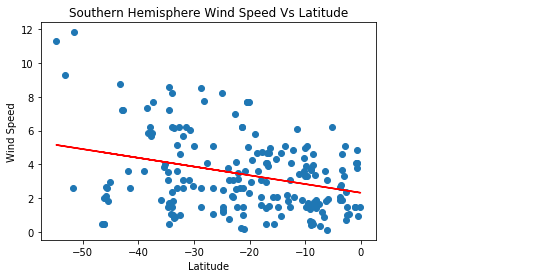

In [88]:
func_reg_plot(Southern_df, 'Southern Hemisphere Wind Speed Vs Latitude', 'Wind Speed', 'Wind Speed', 'regress_Southern_LatVsWindSpeed.png', (10,0))

